#### Import numpy, matplotlib.pyplot 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

To have a dataset or set of data points, I generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x= np.linspace(0,20,128)
x=x.reshape(-1,1)
x.shape

(128, 1)

In [4]:
y= -x +2
y.shape

(128, 1)

#### Plotting my data points. 

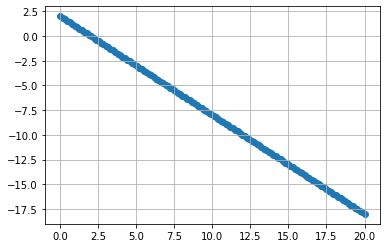

In [6]:
plt.scatter(x,y)
plt.grid()
plt.show()

## Adagrad

### For a single variable linear regression ML model, I built a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't be below 0.9
#### I then Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Finally, I tried different values of the huperparameters and saw the differnce in results.

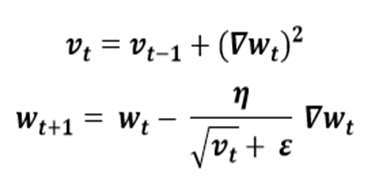

In [72]:
def Adagrad(x,y,alpha,epsilon,max_iter):

    error=[]
    m=x.shape[0]
    max_iter=max_iter
    alpha=alpha
    theta1 = np.zeros(shape=(x.shape[1],1))
    theta0= np.zeros(shape=(1,1))
    gamma=0.8
    v1=0
    v0=0

    epsilon=epsilon
    weights1=[]
    weights0=[]

    for i in range(max_iter):



        h = x@theta1+theta0
        loss= 1/(2*m) * (np.linalg.norm(h-y))**2
        gradient1 = (1/m) * x.T@(h-y)
        gradient0 = (1/m)* sum(h-y)

        v1+= (gradient1)**2
        v0+= (gradient0)**2

        theta1 = theta1- (alpha/(v1**0.5+epsilon))*gradient1 
        theta0 = theta0 - (alpha/(v0**0.5+epsilon))*gradient0

        error.append(loss)
        weights1.append(np.squeeze(theta1))
        weights0.append(np.squeeze(theta0))
        

        plt.plot(x,h)
        
    



    plt.show()
    
    print("error   , theta1   ,theta0")
    print(*zip(error,weights1,weights0),sep="\n")
    
    
    plt.plot(range(1,len(error)+1),error)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()

    

    plt.plot(weights1,error)
    plt.xlabel("theta1")
    plt.ylabel("loss")
    plt.grid()
    plt.show()

    plt.plot(weights0,error)
    plt.xlabel("theta0")
    plt.ylabel("loss")
    plt.grid()
    plt.show()
    
    plt.plot(x,h)
    plt.scatter(x,y,c='r')
    plt.title("Best Fit")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()

    

    print("mean squared error equals: ",loss,'\n')
    print("R_squared equals: ",r2_score(h,y),end='\n\n')
    print({'theta1':theta1,'theta0':theta0}) 


   

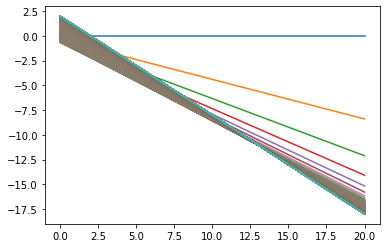

error   , theta1   ,theta0
(48.92913385826772, array(-0.4), array(-0.4))
(12.574488192754796, array(-0.57733653), array(-0.56414587))
(4.406229545967822, array(-0.67198643), array(-0.63862327))
(2.027223715837169, array(-0.72511867), array(-0.66728833))
(1.2824841681906647, array(-0.75572415), array(-0.67093101))
(1.0362044476755778, array(-0.77381396), array(-0.66073918))
(0.9456487406748264, array(-0.78489333), array(-0.64294003))
(0.9042955928175778, array(-0.79203112), array(-0.62102415))
(0.8787248865365868, array(-0.79694577), array(-0.59694818))
(0.8584132695533789, array(-0.80060119), array(-0.57180701))
(0.8400377677988553, array(-0.80353844), array(-0.5462118))
(0.8225432982512892, array(-0.80606144), array(-0.52050254))
(0.8055898261117701, array(-0.80834103), array(-0.49486727))
(0.7890630731986266, array(-0.81047333), array(-0.46940898))
(0.7729202430275843, array(-0.8125125), array(-0.44418306))
(0.7571413401142433, array(-0.81448918), array(-0.4192183))
(0.74171379069355

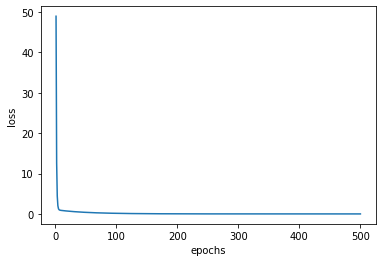

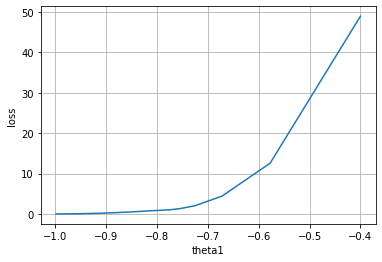

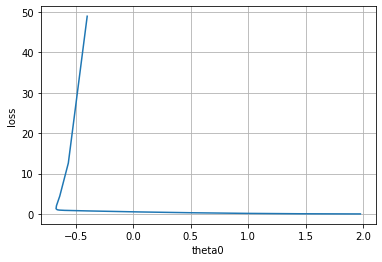

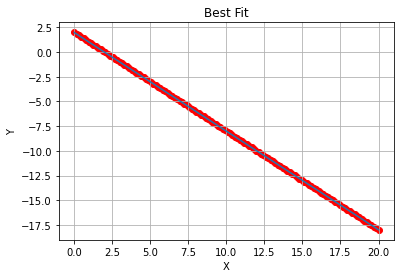

mean squared error equals:  7.329310605559358e-05 

R_squared equals:  0.999995654618471

{'theta1': array([[-0.9981775]]), 'theta0': array([[1.97617346]])}


In [55]:
Adagrad(x,y,alpha=0.4,epsilon=1e-8,max_iter=500)

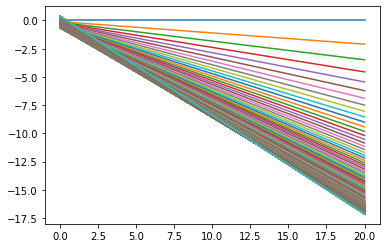

error   , theta1   ,theta0
(48.92913385826772, array(-0.1), array(-0.1))
(37.517598426933, array(-0.16579292), array(-0.16531268))
(30.857178987865975, array(-0.21694896), array(-0.2157857))
(26.14298571491431, array(-0.2594684), array(-0.25748652))
(22.53379197257425, array(-0.29610741), array(-0.29319853))
(19.648753916360985, array(-0.32840008), array(-0.3244699))
(17.278590739263343, array(-0.35730429), array(-0.35226689))
(15.294260286958393, array(-0.38346612), array(-0.37724111))
(13.609843267187797, array(-0.40734623), array(-0.39985721))
(12.164900929167429, array(-0.42928725), array(-0.42046081))
(10.915128404930108, array(-0.44955258), array(-0.43931773))
(9.82699031536629, array(-0.46835018), array(-0.45663797))
(8.874445933145443, array(-0.48584792), array(-0.47259117))
(8.036849255722487, array(-0.50218383), array(-0.48731699))
(7.2975473367174555, array(-0.51747324), array(-0.50093225))
(6.642912900372229, array(-0.53181377), array(-0.51353603))
(6.061657527893846, array

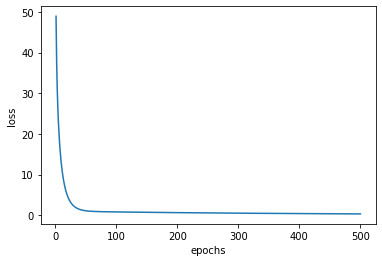

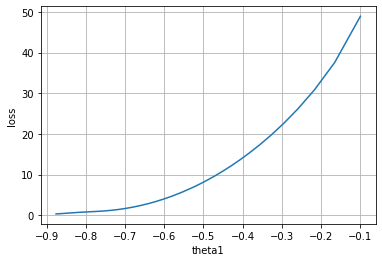

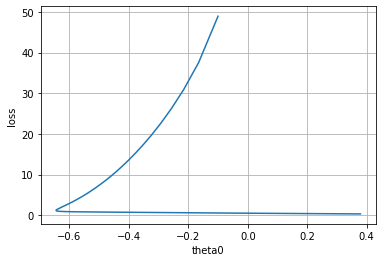

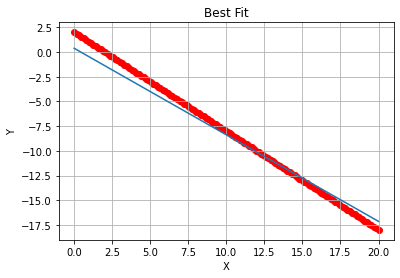

mean squared error equals:  0.33377564017740796 

R_squared equals:  0.9742906474433997

{'theta1': array([[-0.8758525]]), 'theta0': array([[0.37869611]])}


In [73]:
Adagrad(x,y,alpha=0.1,epsilon=1e-8,max_iter=500)

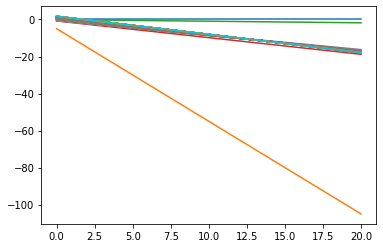

error   , theta1   ,theta0
(48.92913385826772, array(-5.), array(-4.99999999))
(1375.3661411726623, array(-0.08613899), array(-0.07089415))
(39.11453423859496, array(-0.89990908), array(-0.80410505))
(1.7953569280598514, array(-0.7826789), array(-0.61717076))
(0.8980870620304228, array(-0.80604388), array(-0.57114814))
(0.8363077193202766, array(-0.80805452), array(-0.50568096))
(0.7955517743754638, array(-0.81315163), array(-0.44492015))
(0.7571747157507611, array(-0.81765085), array(-0.38517828))
(0.72066024549954, array(-0.82211133), array(-0.32696901))
(0.6859090358389061, array(-0.82645188), array(-0.27017328))
(0.6528355415108951, array(-0.83068787), array(-0.21476852))
(0.6213585763643463, array(-0.83481998), array(-0.16071863))
(0.591400905204984, array(-0.83885107), array(-0.10799055))
(0.5628890450310138, array(-0.84278358), array(-0.05655172))
(0.5357530812415815, array(-0.84661994), array(-0.00637043))
(0.5099264929943186, array(-0.8503625), array(0.04258423))
(0.4853459872

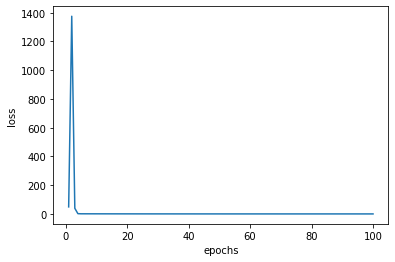

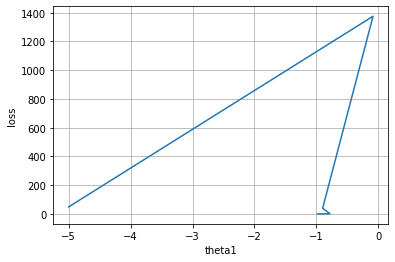

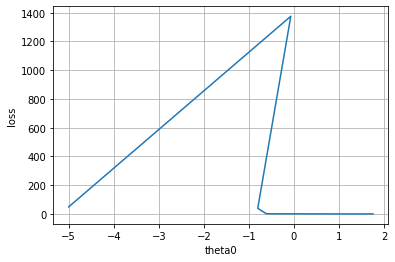

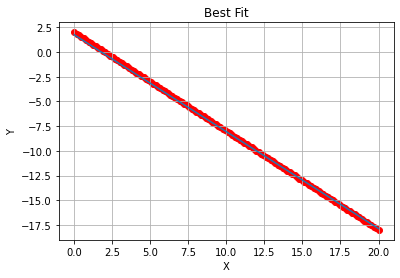

mean squared error equals:  0.008061339799122717 

R_squared equals:  0.9995049073424891

{'theta1': array([[-0.98118555]]), 'theta0': array([[1.75388226]])}


In [76]:
Adagrad(x,y,alpha=5,epsilon=1e-8,max_iter=100)

## RMSProp

### I update the previos implementation to be RMSProp.
#### Then I compared my results with Adagrad results.

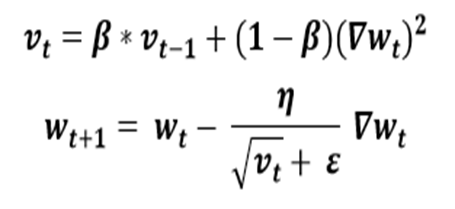

In [56]:
def RmsProp(x,y,alpha,epsilon,max_iter):

    error=[]
    m=x.shape[0]
    max_iter=max_iter
    alpha=alpha
    theta1 = np.zeros(shape=(x.shape[1],1))
    theta0= np.zeros(shape=(1,1))
    beta= 0.9
    v1=0
    v0=0

    epsilon=epsilon
    weights1=[]
    weights0=[]

    for i in range(max_iter):



        h = x@theta1+theta0
        loss= 1/(2*m) * (np.linalg.norm(h-y))**2
        gradient1 = (1/m) * x.T@(h-y)
        gradient0 = (1/m)* sum(h-y)
        v1 = beta*v1 +(1-beta)*(gradient1)**2
        v0 = beta*v0 +(1-beta)*(gradient0)**2
        theta1 = theta1- (alpha/(v1**0.5+epsilon))*gradient1 
        theta0 = theta0 - (alpha/(v0**0.5+epsilon))*gradient0

        error.append(loss)
        weights1.append(np.squeeze(theta1))
        weights0.append(np.squeeze(theta0))
        

        plt.plot(x,h)
        
    



    plt.show()
    
    print("error   , theta1   ,theta0")
    print(*zip(error,weights1,weights0),sep="\n")
    
    
    plt.plot(range(1,len(error)+1),error)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()

    

    plt.plot(weights1,error)
    plt.xlabel("theta1")
    plt.ylabel("loss")
    plt.grid()
    plt.show()

    plt.plot(weights0,error)
    plt.xlabel("theta0")
    plt.ylabel("loss")
    plt.grid()
    plt.show()
    
    plt.plot(x,h)
    plt.scatter(x,y,c='r')
    plt.title("Best Fit")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()

    

    print("mean squared error equals: ",loss,'\n')
    print("R_squared equals: ",r2_score(h,y),end='\n\n')
    print({'theta1':theta1,'theta0':theta0}) 


   

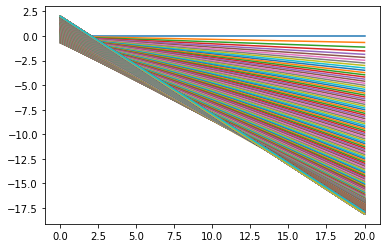

error   , theta1   ,theta0
(48.92913385826772, array(-0.03162278), array(-0.03162278))
(45.15306621697437, array(-0.05411616), array(-0.05407523))
(42.56169113344165, array(-0.07272103), array(-0.07262367))
(40.47764803449901, array(-0.08908062), array(-0.08891732))
(38.689497624923895, array(-0.10395275), array(-0.10371629))
(37.09996541818322, array(-0.11775806), array(-0.11744232))
(35.655164313534634, array(-0.13075747), array(-0.1303569))
(34.321729362338296, array(-0.14312536), array(-0.14263473))
(33.07740406131083, array(-0.15498465), array(-0.15439892))
(31.906526655008946, array(-0.16642558), array(-0.16573975))
(30.797623942216617, array(-0.17751645), array(-0.17672558))
(29.742023898490068, array(-0.18831029), array(-0.18740942))
(28.733005753084598, array(-0.19884912), array(-0.19783323))
(27.765253531288636, array(-0.20916677), array(-0.20803077))
(26.83449055205907, array(-0.21929087), array(-0.21802957))
(25.93722677608249, array(-0.22924426), array(-0.22785236))
(25.07

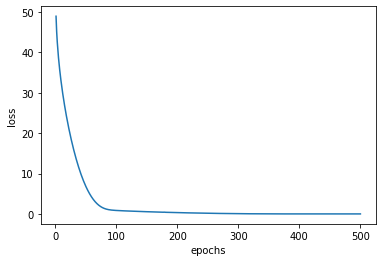

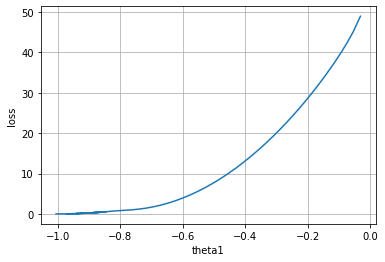

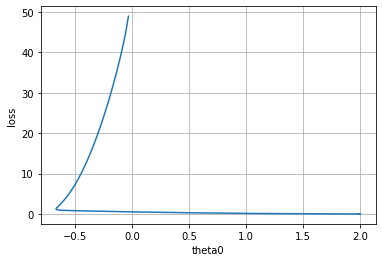

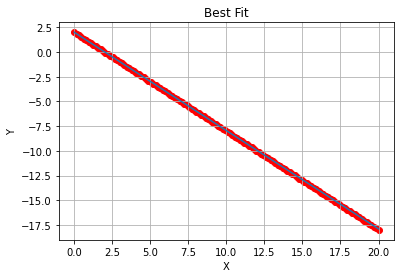

mean squared error equals:  0.0019358529134743795 

R_squared equals:  0.9998844796947969

{'theta1': array([[-1.00492653]]), 'theta0': array([[1.99403917]])}


In [58]:
RmsProp(x,y,alpha=0.01,epsilon=1e-8,max_iter=500)

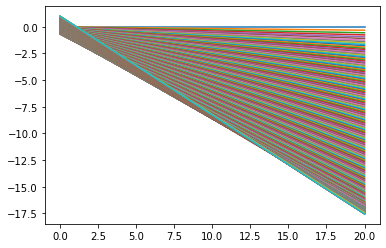

error   , theta1   ,theta0
(48.92913385826772, array(-0.01581139), array(-0.01581139))
(47.021742754177325, array(-0.0271719), array(-0.02716199))
(45.67525676745035, array(-0.03662849), array(-0.03660515))
(44.56970896000293, array(-0.04498572), array(-0.04494689))
(43.60423747360176, array(-0.05261596), array(-0.05256019))
(42.732216390876985, array(-0.05972635), array(-0.05965248))
(41.92773479839404, array(-0.06644563), array(-0.06635265))
(41.17471154111327, array(-0.07285994), array(-0.07274695))
(40.46239887749281, array(-0.07903009), array(-0.07889624))
(39.78322142909474, array(-0.08500077), array(-0.08484526))
(39.1316220382328, array(-0.09080583), array(-0.09062791))
(38.503395319429124, array(-0.09647163), array(-0.09627054))
(37.895278879087414, array(-0.10201905), array(-0.10179408))
(37.30469020931225, array(-0.10746494), array(-0.10721538))
(36.72955054083962, array(-0.11282311), array(-0.11254824))
(36.16816297775847, array(-0.11810496), array(-0.11780411))
(35.6191258

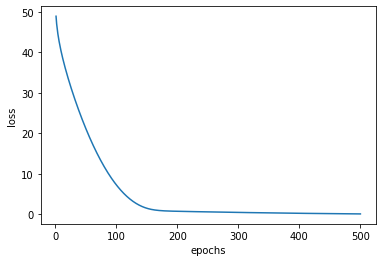

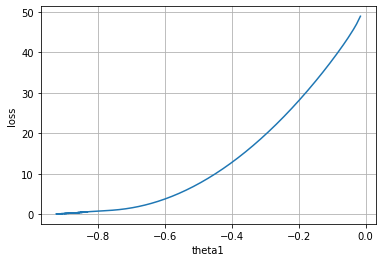

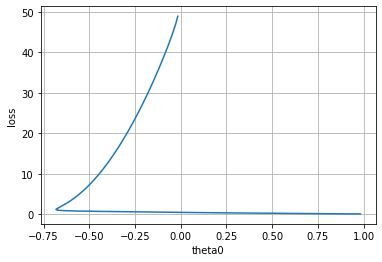

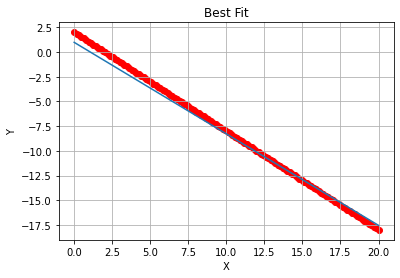

mean squared error equals:  0.13252674870967862 

R_squared equals:  0.990869530447022

{'theta1': array([[-0.9213212]]), 'theta0': array([[0.98294408]])}


In [75]:
RmsProp(x,y,alpha=0.005,epsilon=1e-8,max_iter=500)

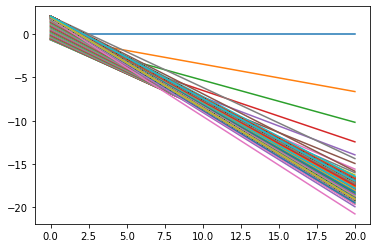

error   , theta1   ,theta0
(48.92913385826772, array(-0.31622777), array(-0.31622776))
(18.137079485069098, array(-0.4853493), array(-0.47807769))
(8.044198217051648, array(-0.59343998), array(-0.57401717))
(3.910644354133437, array(-0.66557236), array(-0.62966362))
(2.14872134532, array(-0.71395799), array(-0.65765547))
(1.405699029246193, array(-0.74613431), array(-0.66602458))
(1.09915648415157, array(-0.76728901), array(-0.66048396))
(0.9723563122714546, array(-0.78111927), array(-0.64521522))
(0.915208153317392, array(-0.79024599), array(-0.62323402))
(0.8830038356182316, array(-0.79647952), array(-0.59664093))
(0.8588199009801325, array(-0.80102518), array(-0.56683673))
(0.8367565680602077, array(-0.80465122), array(-0.53471154))
(0.814945665722132, array(-0.80782389), array(-0.50080261))
(0.7928655067917382, array(-0.81081107), array(-0.4654173))
(0.7704023792512933, array(-0.81375749), array(-0.42872263))
(0.7475549989523494, array(-0.81673594), array(-0.39080622))
(0.724351503

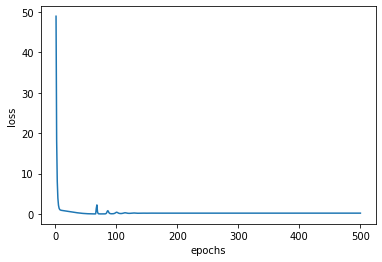

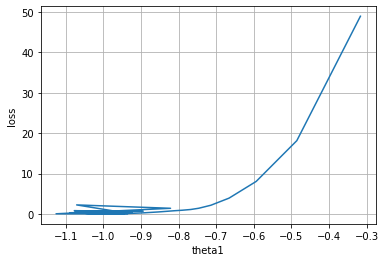

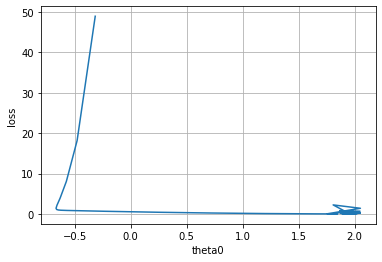

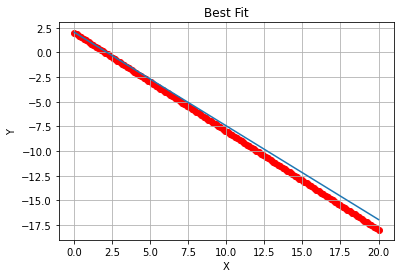

mean squared error equals:  0.19357283365038133 

R_squared equals:  0.9873304129987185

{'theta1': array([[-1.05]]), 'theta0': array([[1.95]])}


In [78]:
RmsProp(x,y,alpha=0.1,epsilon=1e-8,max_iter=500)

## Adam

### Update the previos implementation to be Adam.
#### Comparing results with Adagrad and RMSProp results.

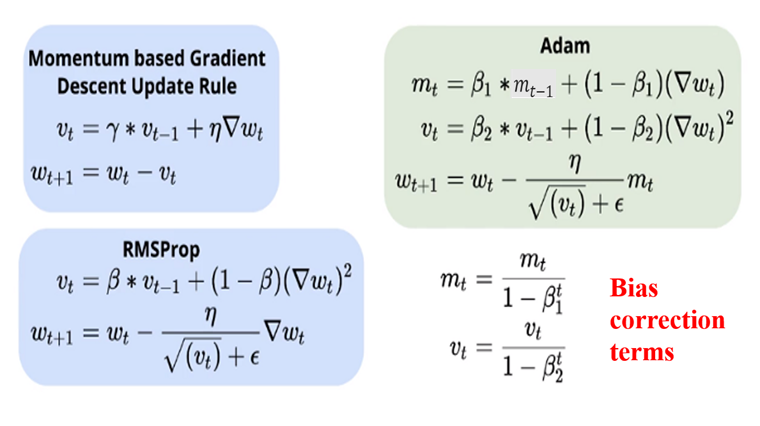

In [87]:
def Adam(x,y,alpha,epsilon,max_iter):

    error=[]
    m=x.shape[0]
    max_iter=max_iter
    alpha=alpha
    theta1 = np.zeros(shape=(x.shape[1],1))
    theta0= np.zeros(shape=(1,1))
    v1=0
    v0=0
    m1=0
    m0=0
    beta1= 0.9
    beta2=0.9
    epsilon=epsilon
    weights1=[]
    weights0=[]

    for i in range(1,max_iter+1):



        h = x@theta1+theta0
        loss= 1/(2*m) * (np.linalg.norm(h-y))**2
        gradient1 = (1/m) * x.T@(h-y)
        gradient0 = (1/m)* sum(h-y)
    
        m1= beta1*m1 + (1-beta1)*gradient1
        m0= beta1*m0 + (1-beta1)*gradient0
    
        v1 = beta2*v1 +(1-beta2)*(gradient1)**2
        v0 = beta2*v0 +(1-beta2)*(gradient0)**2
    

    
        v1_correct=v1/(1-beta2**i)
        v0_correct=v0/(1-beta2**i)
    
        m1_correct=m1/(1-beta1**i)
        m0_correct=m0/(1-beta1**i)
    

    
    
        theta1 = theta1- (alpha/((v1_correct**0.5)+epsilon))*m1_correct 
        theta0 = theta0 - (alpha/((v0_correct**0.5)+epsilon))*m0_correct
        
        error.append(loss)
        weights1.append(np.squeeze(theta1))
        weights0.append(np.squeeze(theta0))

        plt.plot(x,h)
        
    



    plt.show()
    
    print("error   , theta1   ,theta0")
    print(*zip(error,weights1,weights0),sep="\n")
    
    
    plt.plot(range(1,len(error)+1),error)
    plt.xlabel("epochs")
    plt.ylabel("loss")
    plt.show()

    

    plt.plot(weights1,error)
    plt.xlabel("theta1")
    plt.ylabel("loss")
    plt.grid()
    plt.show()

    plt.plot(weights0,error)
    plt.xlabel("theta0")
    plt.ylabel("loss")
    plt.grid()
    plt.show()
    
    plt.plot(x,h)
    plt.scatter(x,y,c='r')
    plt.title("Best Fit")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid()
    plt.show()

    

    print("mean squared error equals: ",loss,'\n')
    print("R_squared equals: ",r2_score(h,y),end='\n\n')
    print({'theta1':theta1,'theta0':theta0}) 


   

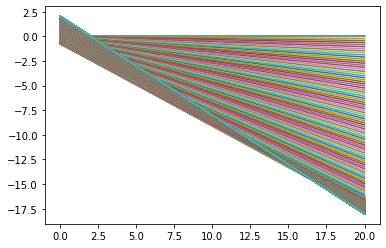

error   , theta1   ,theta0
(48.92913385826772, array(-0.01), array(-0.01))
(47.71829409468554, array(-0.0199998), array(-0.01999976))
(46.52296439905105, array(-0.02999925), array(-0.02999912))
(45.34316048628639, array(-0.03999822), array(-0.03999789))
(44.178897663020436, array(-0.04999656), array(-0.04999591))
(43.03019075165509, array(-0.05999411), array(-0.05999299))
(41.89705401842748, array(-0.06999072), array(-0.06998894))
(40.779501106117436, array(-0.07998623), array(-0.07998358))
(39.677544971967535, array(-0.08998049), array(-0.0899767))
(38.591197831293655, array(-0.09997333), array(-0.09996812))
(37.520471107166884, array(-0.1099646), array(-0.10995762))
(36.46537538644854, array(-0.11995412), array(-0.11994501))
(35.425920382357496, array(-0.12994174), array(-0.12993008))
(34.40211490364793, array(-0.13992729), array(-0.13991262))
(33.393966830377124, array(-0.1499106), array(-0.14989242))
(32.40148309614789, array(-0.1598915), array(-0.15986926))
(31.42466967662246, arr

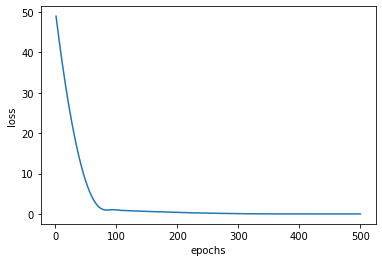

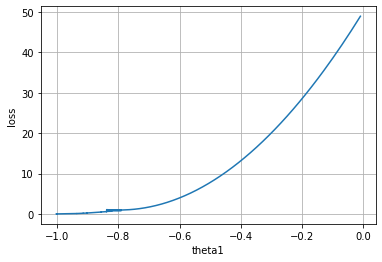

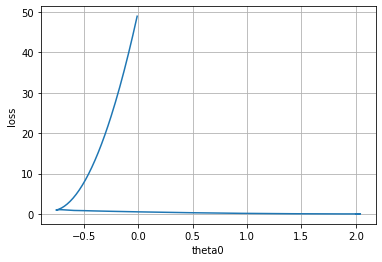

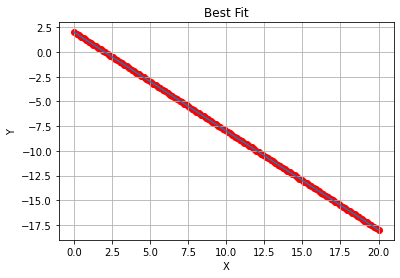

mean squared error equals:  1.4049694848390462e-05 

R_squared equals:  0.9999991694063883

{'theta1': array([[-1.00033677]]), 'theta0': array([[1.99984942]])}


In [88]:
Adam(x,y,alpha=0.01,epsilon=1e-8,max_iter=500)

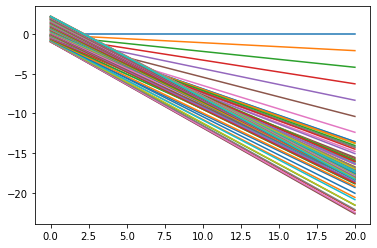

error   , theta1   ,theta0
(48.92913385826772, array(-0.1), array(-0.1))
(37.517598426933, array(-0.19977242), array(-0.19972724))
(27.675595718124733, array(-0.29907407), array(-0.29887883))
(19.411077439753186, array(-0.39755292), array(-0.39700236))
(12.723565324558681, array(-0.4946982), array(-0.49342039))
(7.598284053895322, array(-0.58977058), array(-0.5871226))
(3.996845618907326, array(-0.68171216), array(-0.67662703))
(1.8431874864524331, array(-0.7690496), array(-0.75984318))
(1.004370312700339, array(-0.84983464), array(-0.83403775))
(1.2693695891089303, array(-0.92171186), array(-0.89608481))
(2.336573539397208, array(-0.98221767), array(-0.94313144))
(3.8288177776876853, array(-1.02930853), array(-0.9734639))
(5.349713641696742, array(-1.06189082), array(-0.986994))
(6.566112140150404, array(-1.08003031), array(-0.98502646))
(7.272788479592259, array(-1.08475007), array(-0.96960516))
(7.40674318719126, array(-1.07762437), array(-0.94292468))
(7.018114019898887, array(-1.0

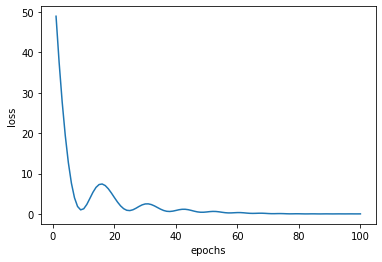

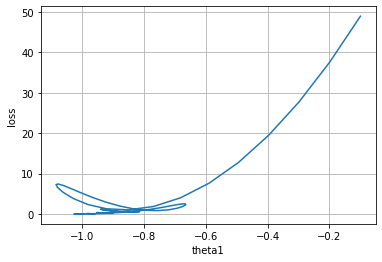

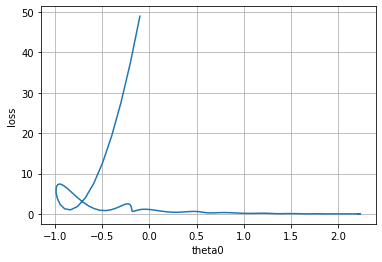

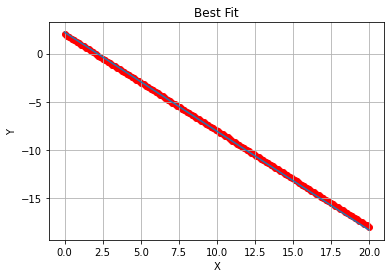

mean squared error equals:  0.012102380106099837 

R_squared equals:  0.9993203415371085

{'theta1': array([[-1.02273592]]), 'theta0': array([[2.20475433]])}


In [89]:
Adam(x,y,alpha=0.1,epsilon=1e-8,max_iter=100)

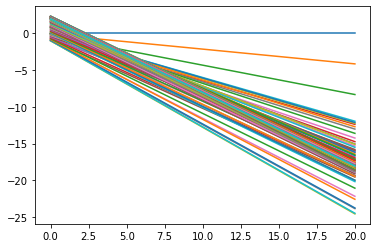

error   , theta1   ,theta0
(48.92913385826772, array(-0.2), array(-0.2))
(27.654645672235933, array(-0.3979152), array(-0.39747126))
(12.70134373747402, array(-0.59050326), array(-0.58822764))
(3.9739379383560007, array(-0.77170058), array(-0.76411071))
(0.9980935982624342, array(-0.9313923), array(-0.91145986))
(2.5558501245376766, array(-1.05659413), array(-1.01431964))
(6.463356394109678, array(-1.13753744), array(-1.06452157))
(10.176578658075503, array(-1.17346292), array(-1.06644435))
(12.034540976208069, array(-1.17084452), array(-1.03047798))
(11.72282158991194, array(-1.13824034), array(-0.96659071))
(9.780397353337149, array(-1.08347159), array(-0.88254993))
(7.026986437318119, array(-1.01314854), array(-0.78431814))
(4.253881779463142, array(-0.9331303), array(-0.6768583))
(2.0920554931744375, array(-0.849195), array(-0.56487357))
(0.9434429023652565, array(-0.76761701), array(-0.4533913))
(0.9225977224781363, array(-0.69531398), array(-0.34804678))
(1.8157621046201122, arra

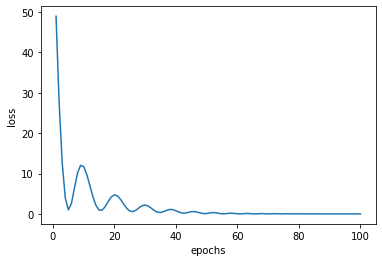

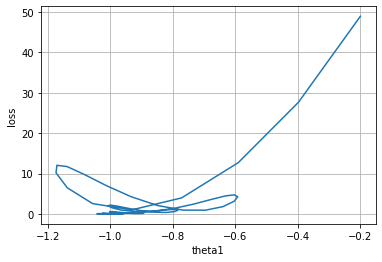

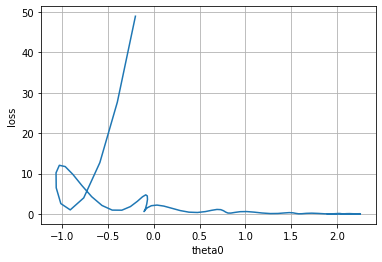

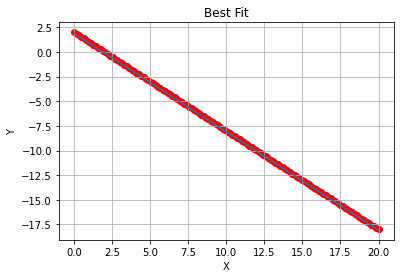

mean squared error equals:  0.002988544603032536 

R_squared equals:  0.999822553660192

{'theta1': array([[-0.985769]]), 'theta0': array([[1.91488723]])}


In [90]:
Adam(x,y,alpha=0.2,epsilon=1e-8,max_iter=100)

## Congratulations 
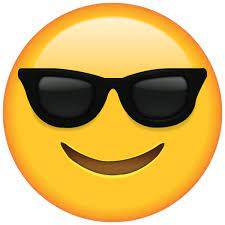